In [59]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)
sns.set(style='white', context='notebook', palette='deep')

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
df = pd.read_csv("./input/autotel_with_target_groupedby.csv",index_col=0)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,neighborhood,Date,Hour,Area,Population,Year,Month,Week,Day,day_name,Temprature,Relative Humidity,Amount of Rain,Wind Speed,Wind Direction,hour_sin_time,hour_cos_time,month_sin_time,month_cos_time,week_sin_time,week_cos_time,day_sin_time,day_cos_time,day_name_sin_time,day_name_cos_time,count
0,'נאות אפקה א,2017-10-23,9.0,353611.36,3035.0,2017.0,10.0,43,23.0,2,25.25,53.33,0.0,1.72,276.17,7.071068e-01,-0.707107,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,5.0
1,'נאות אפקה א,2017-10-23,12.0,353611.36,3035.0,2017.0,10.0,43,23.0,2,25.65,58.67,0.0,4.25,302.17,1.224647e-16,-1.000000,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,27.0
2,'נאות אפקה א,2017-10-23,22.0,353611.36,3035.0,2017.0,10.0,43,23.0,2,22.92,62.33,0.0,1.37,127.17,-5.000000e-01,0.866025,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,12.0
3,'נאות אפקה א,2017-10-24,7.0,353611.36,3035.0,2017.0,10.0,43,24.0,3,20.83,69.50,0.0,2.58,119.67,9.659258e-01,-0.258819,-0.866025,0.5,-0.885456,0.464723,-0.988468,0.151428,0.433884,-0.900969,1.0
4,'נאות אפקה א,2017-10-24,15.0,353611.36,3035.0,2017.0,10.0,43,24.0,3,25.03,58.17,0.0,4.07,294.17,-7.071068e-01,-0.707107,-0.866025,0.5,-0.885456,0.464723,-0.988468,0.151428,0.433884,-0.900969,4.0


In [5]:
df_n1 = df[df['neighborhood'] == 'לב תל-אביב']
df_n2 = df[df['neighborhood'] == 'הצפון הישן - החלק הצפוני']
df_n3 = df[df['neighborhood'] == 'הצפון הישן-החלק הדרומי']
df_n4 = df[df['neighborhood'] == 'צפון יפו']

In [6]:
print(f'לב תל-אביב: {df_n1.shape}')
print(f'הצפון הישן - החלק הצפוני: {df_n2.shape}')
print(f'הצפון הישן-החלק הדרומי: {df_n3.shape}')
print(f'צפון יפו: {df_n4.shape}')

לב תל-אביב: (2639, 26)
הצפון הישן - החלק הצפוני: (2603, 26)
הצפון הישן-החלק הדרומי: (2387, 26)
צפון יפו: (1622, 26)


In [7]:
df.head()

,neighborhood,Date,Hour,Area,Population,Year,Month,Week,Day,day_name,Temprature,Relative Humidity,Amount of Rain,Wind Speed,Wind Direction,hour_sin_time,hour_cos_time,month_sin_time,month_cos_time,week_sin_time,week_cos_time,day_sin_time,day_cos_time,day_name_sin_time,day_name_cos_time,count
0,'נאות אפקה א,2017-10-23,9.0,353611.36,3035.0,2017.0,10.0,43,23.0,2,25.25,53.33,0.0,1.72,276.17,7.071068e-01,-0.707107,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,5.0
1,'נאות אפקה א,2017-10-23,12.0,353611.36,3035.0,2017.0,10.0,43,23.0,2,25.65,58.67,0.0,4.25,302.17,1.224647e-16,-1.000000,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,27.0
2,'נאות אפקה א,2017-10-23,22.0,353611.36,3035.0,2017.0,10.0,43,23.0,2,22.92,62.33,0.0,1.37,127.17,-5.000000e-01,0.866025,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,12.0
3,'נאות אפקה א,2017-10-24,7.0,353611.36,3035.0,2017.0,10.0,43,24.0,3,20.83,69.50,0.0,2.58,119.67,9.659258e-01,-0.258819,-0.866025,0.5,-0.885456,0.464723,-0.988468,0.151428,0.433884,-0.900969,1.0
4,'נאות אפקה א,2017-10-24,15.0,353611.36,3035.0,2017.0,10.0,43,24.0,3,25.03,58.17,0.0,4.07,294.17,-7.071068e-01,-0.707107,-0.866025,0.5,-0.885456,0.464723,-0.988468,0.151428,0.433884,-0.900969,4.0


In [8]:
n1 = df_n1[['Month','Day','day_name','count']]

In [9]:
n1_grouped = n1[['Month','day_name','count']].groupby(['Month','day_name']).mean().reset_index()

In [10]:
n1_grouped.head()

,Month,day_name,count
0,1.0,1,18.074074
1,1.0,2,16.645570
2,1.0,3,20.243243
3,1.0,4,17.459459
4,1.0,5,17.448276


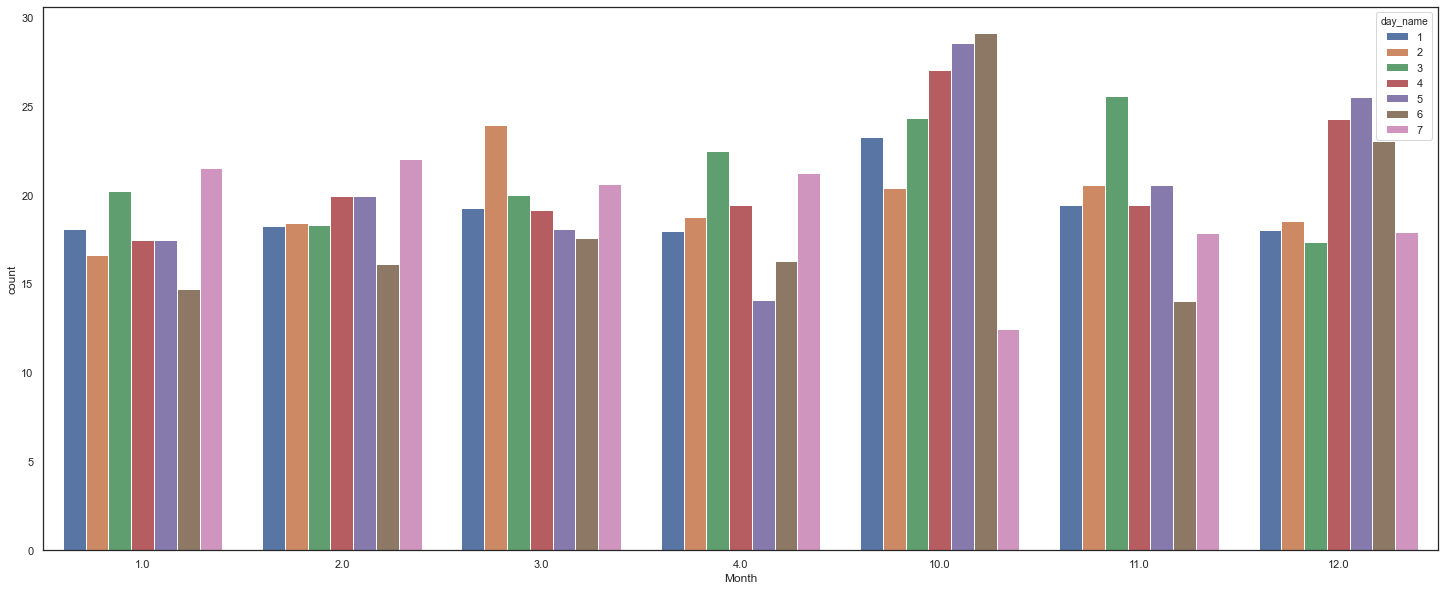

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(data=n1_grouped,x='Month',y='count',hue='day_name')

In [12]:
n1 = df_n1[['Month','Day','day_name','count']]

@interact
def barplot(column=['day_name','Day'],aggregate=['mean','sum']):
    n1_grouped = n1[['Month',column,'count']].groupby(['Month',column])
    if(aggregate == 'sum'):
        n1_grouped = n1_grouped.sum().reset_index()
    else:
        n1_grouped = n1_grouped.mean().reset_index()
    
    plt.figure(figsize=(25,10))
    sns.barplot(data=n1_grouped,x='Month',y='count',hue=column)
    plt.title(f'{aggregate} number of cars by {column} per month',fontsize=20)

interactive(children=(Dropdown(description='column', options=('day_name', 'Day'), value='day_name'), Dropdown(…

In [13]:
n1_2 = df_n1[['Month','Week','Day','day_name','Hour','count']]

@interact
def barplot(column=['Month','Week','Day','day_name'],aggregate=['mean','sum']):
    n1_2_grouped = n1_2[[column,'Hour','count']].groupby([column,'Hour'])
    if(aggregate == 'sum'):
        n1_2_grouped = n1_2_grouped.sum().reset_index()
    else:
        n1_2_grouped = n1_2_grouped.mean().reset_index()

    plt.figure(figsize=(25,10))
    sns.barplot(data=n1_2_grouped,x=column,y='count',hue='Hour')
#     sns.lineplot(data=n1_2_grouped,x='Hour',y='count',hue=column)
    plt.title(f'{aggregate} number of cars by {column} per hour',fontsize=20)

interactive(children=(Dropdown(description='column', options=('Month', 'Week', 'Day', 'day_name'), value='Mont…

In [14]:
n1_3 = df_n1[['Month','Week','Day','day_name','count']]
@interact
def barplot(column=['Month','Week','Day','day_name'],aggregate=['mean','sum']):
    n1_3_grouped = n1_3[[column,'count']].groupby(column)
    if(aggregate == 'sum'):
        n1_3_grouped = n1_3_grouped.sum().reset_index()
    else:
        n1_3_grouped = n1_3_grouped.mean().reset_index()
            
    plt.figure(figsize=(25,10))
    sns.barplot(data=n1_3_grouped,x=column,y='count')
    plt.title(f'{aggregate} number of cars by {column} per hour',fontsize=20)

interactive(children=(Dropdown(description='column', options=('Month', 'Week', 'Day', 'day_name'), value='Mont…

In [17]:
df_n1.head()

,neighborhood,Date,Hour,Area,Population,Year,Month,Week,Day,day_name,Temprature,Relative Humidity,Amount of Rain,Wind Speed,Wind Direction,hour_sin_time,hour_cos_time,month_sin_time,month_cos_time,week_sin_time,week_cos_time,day_sin_time,day_cos_time,day_name_sin_time,day_name_cos_time,count
25660,לב תל-אביב,2017-10-23,1.0,1977207.47,33239.0,2017.0,10.0,43,23.0,2,19.90,68.83,0.0,2.78,119.00,0.258819,9.659258e-01,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,12.0
25661,לב תל-אביב,2017-10-23,6.0,1977207.47,33239.0,2017.0,10.0,43,23.0,2,18.82,73.17,0.0,3.27,120.17,1.000000,6.123234e-17,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,3.0
25662,לב תל-אביב,2017-10-23,8.0,1977207.47,33239.0,2017.0,10.0,43,23.0,2,23.15,58.00,0.0,1.83,113.83,0.866025,-5.000000e-01,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,43.0
25663,לב תל-אביב,2017-10-23,9.0,1977207.47,33239.0,2017.0,10.0,43,23.0,2,25.25,53.33,0.0,1.72,276.17,0.707107,-7.071068e-01,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,5.0
25664,לב תל-אביב,2017-10-23,10.0,1977207.47,33239.0,2017.0,10.0,43,23.0,2,25.65,54.33,0.0,2.67,303.00,0.500000,-8.660254e-01,-0.866025,0.5,-0.885456,0.464723,-0.998717,-0.050649,0.974928,-0.222521,5.0


In [131]:
start_date = '2018-1-1'
end_date = '2018-1-14'
mask = (df_n1['Date'] > start_date) & (df_n1['Date'] <= end_date)
n1_time_range = df_n1.loc[mask]

In [132]:
n1_time_range['Date'] = n1_time_range['Date'] + pd.to_timedelta(n1_time_range['Hour'], unit='h')
n1_time_range['Date'] = n1_time_range['Date'].dt.strftime('%Y-%m-%d %H')
n1_time_range = n1_time_range[['Date','day_name','count']]

In [133]:
n1_time_range

,Date,day_name,count
26598,2018-01-02 00,3,8.0
26599,2018-01-02 01,3,12.0
26600,2018-01-02 08,3,17.0
26601,2018-01-02 09,3,39.0
26602,2018-01-02 10,3,53.0
...,...,...,...
26686,2018-01-14 19,1,40.0
26687,2018-01-14 20,1,22.0
26688,2018-01-14 21,1,13.0
26689,2018-01-14 22,1,17.0


In [134]:
n1_1_time_range = n1_time_range[['Date','count']].groupby(['Date']).mean().reset_index()

In [135]:
tmp = n1_1_time_range

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 <a list of 93 Text major ticklabel objects>)

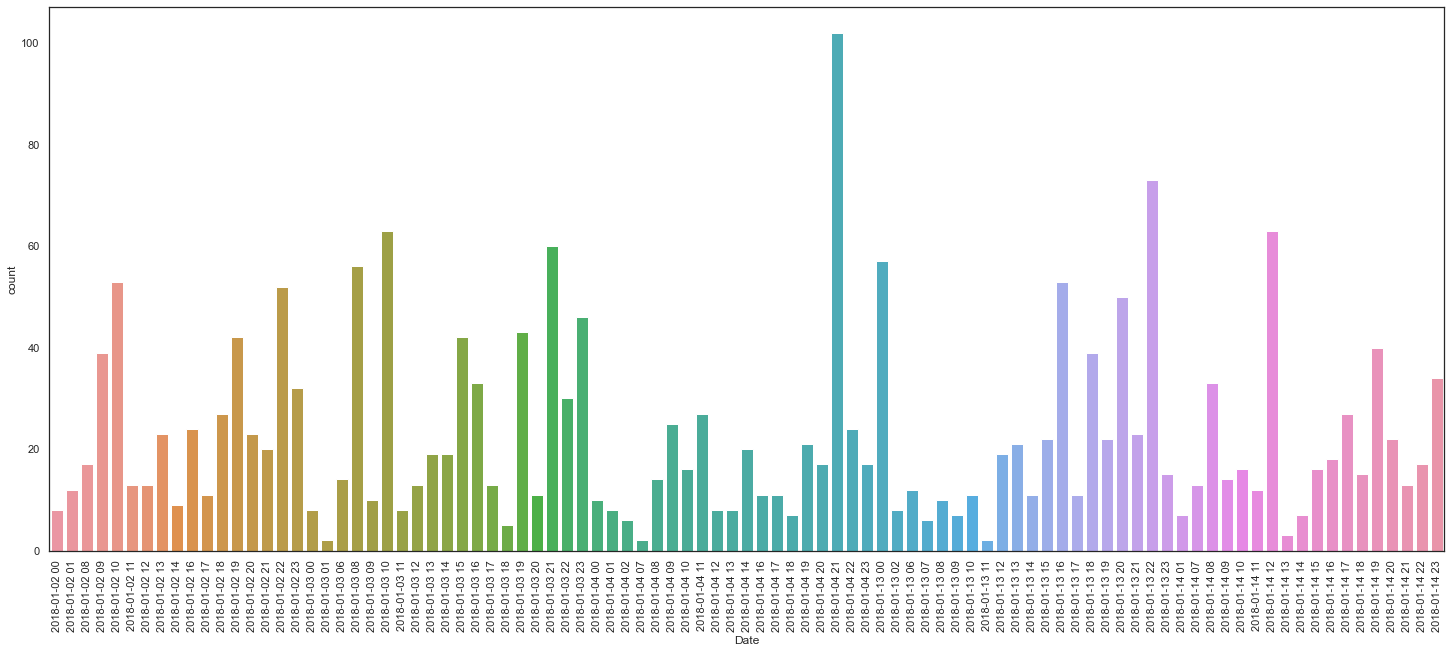

In [136]:
plt.figure(figsize=(25,10))
sns.barplot(data=n1_1_time_range, x='Date', y='count')
plt.title(f'number of cars per hour',fontsize=20)
plt.xticks(rotation=90)